# Modelos de clasificacion - Random forest
Este modelo tiene como objetivo predecir si un equipo ganará o no una ronda en Counter Strike, utilizando un enfoque más flexible que la regresión logística.

Se utilizará un Random Forest Classifier, que combina múltiples árboles de decisión para generar una predicción más robusta. Esto es especialmente útil cuando se planea usar el modelo en una futura interfaz interactiva.

Se utilizan las siguientes variables numéricas relevantes del dataset, asociadas a la participación de los jugadores durante la ronda y el match:

- `RLethalGrenadesThrown`, `RNonLethalGrenadesThrown`
- `PrimaryAssaultRifle`, `PrimarySniperRifle`, `PrimaryHeavy`, `PrimarySMG`, `PrimaryPistol`
- `RoundKills`, `RoundAssists`, `RoundHeadshots`, `RoundFlankKills`
- `RoundStartingEquipmentValue`
- `MatchKills`, `MatchFlankKills`, `MatchAssists`, `MatchHeadshots`

Estas variables excluyen identificadores y atributos categóricos.

In [ ]:
import pandas as pd
#Carga de datos
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='utf-8')

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (1).csv


/tmp/ipython-input-8-2125804881.py:7: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", encoding='utf-8')


In [ ]:
# Limpiar la variable objetivo
df['RoundWinner'] = df['RoundWinner'].astype(str).str.strip()
df = df[df['RoundWinner'].isin(['True', 'False'])]
df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})

# Variables predictoras
features = [
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'PrimaryAssaultRifle',
    'PrimarySniperRifle',
    'PrimaryHeavy',
    'PrimarySMG',
    'PrimaryPistol',
    'RoundKills',
    'RoundAssists',
    'RoundHeadshots',
    'RoundFlankKills',
    'RoundStartingEquipmentValue',
    'MatchKills',
    'MatchFlankKills',
    'MatchAssists',
    'MatchHeadshots'
]

X = df[features]
y = df['RoundWinner']

# División 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-9-3702554015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RoundWinner'] = df['RoundWinner'].map({'True': 1, 'False': 0})


In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

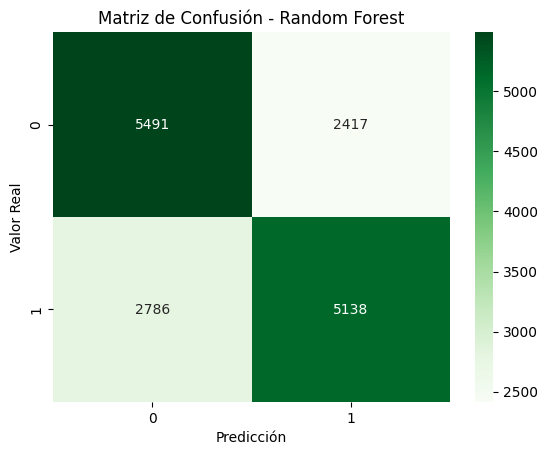

              precision    recall  f1-score   support

           0       0.66      0.69      0.68      7908
           1       0.68      0.65      0.66      7924

    accuracy                           0.67     15832
   macro avg       0.67      0.67      0.67     15832
weighted avg       0.67      0.67      0.67     15832



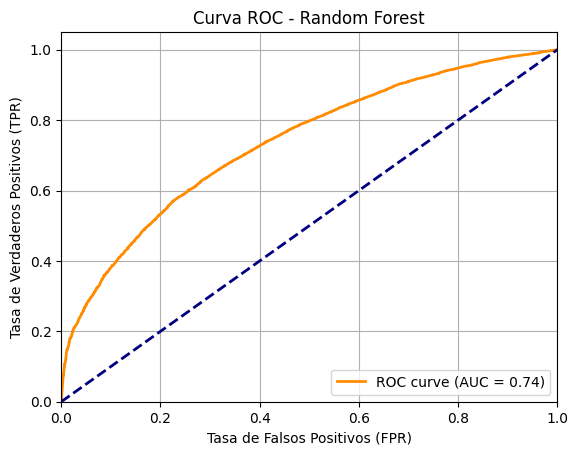

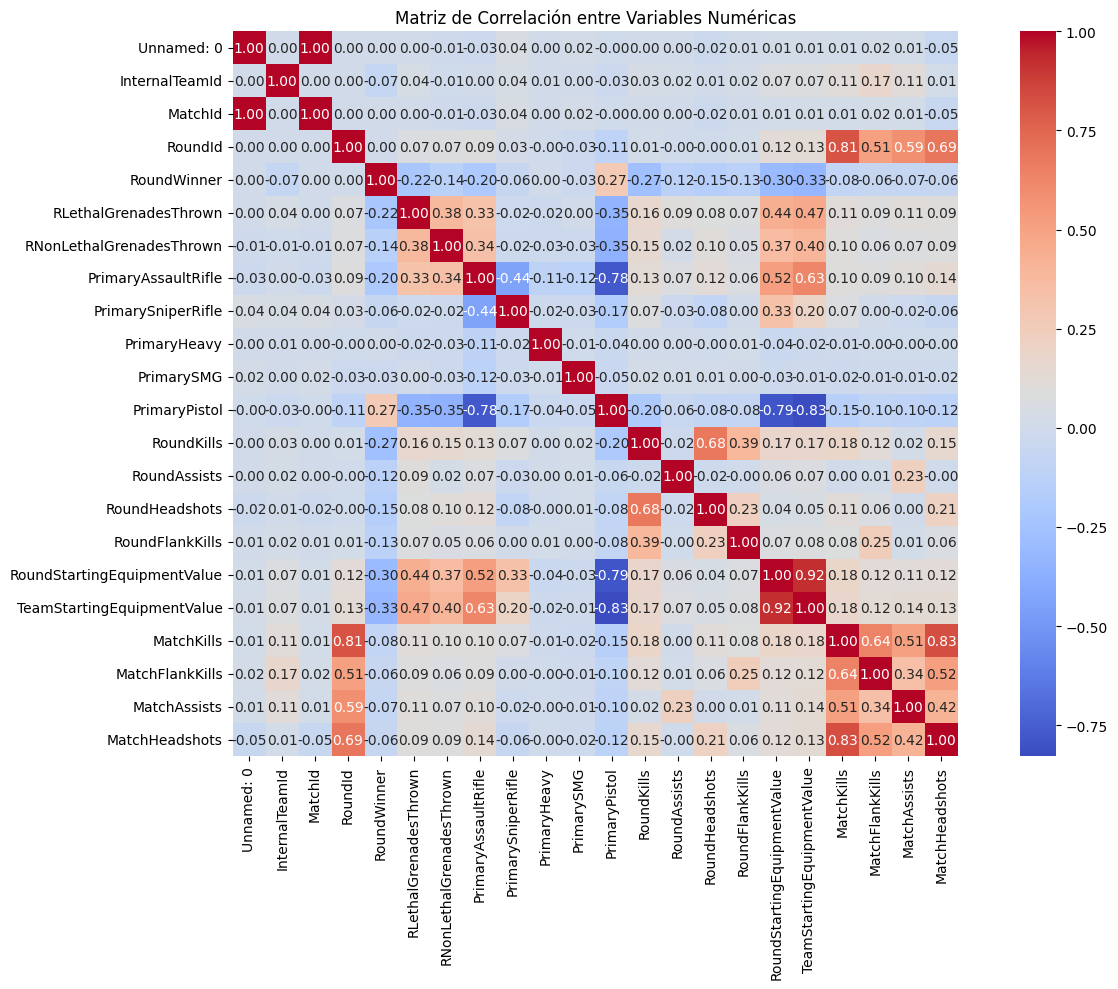

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de confusión
matriz_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

# Métricas
print(classification_report(y_test, y_pred_rf))
# Probabilidades de predicción para la clase positiva (1)
y_probs_rf = modelo_rf.predict_proba(X_test)[:, 1]

# Calcular los valores de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea base
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las variables numéricas
df_numericas = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlacion = df_numericas.corr()

# Generar el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.tight_layout()
plt.show()



El segundo modelo utilizó Random Forest para predecir el resultado de la ronda (`RoundWinner`). Este modelo obtuvo un accuracy similar al de la regresión logística (~67%), pero mostró una ligera mejora en F1-score y en la detección de una de las clases, gracias a su capacidad para capturar relaciones no lineales.

Random Forest demostró ser más robusto ante posibles ruidos en los datos y no requiere normalización de variables, lo que lo convierte en un buen candidato para su futura implementación en una interfaz. Sin embargo, el desempeño general se mantuvo limitado por la capacidad predictiva de las variables disponibles.